In [2]:
%matplotlib inline
import skimage.color
import skimage.io
import numpy
import pandas

import matplotlib.pyplot as plt

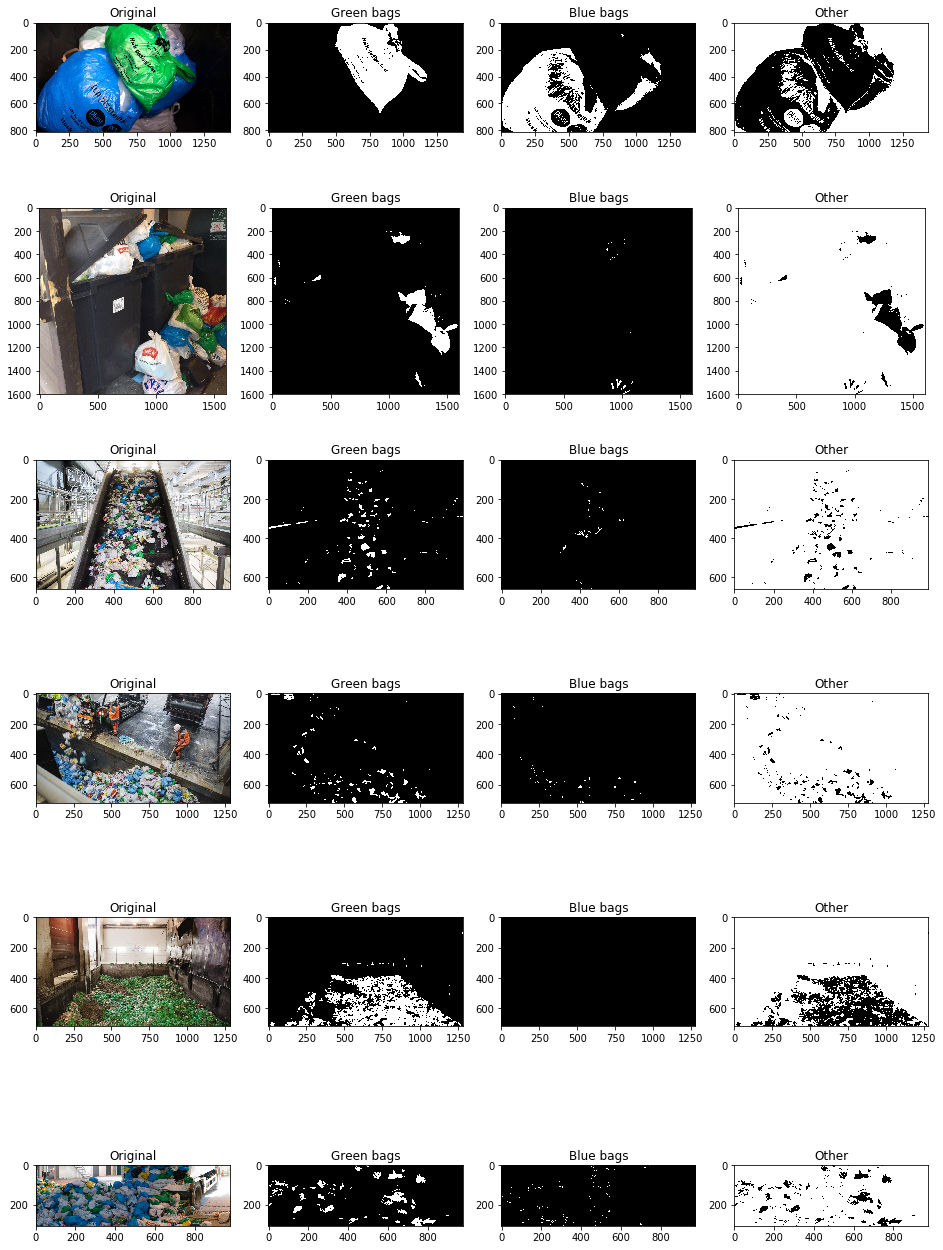

In [39]:
bag_colors = {
    # RGB
    'green': (0, 1.0, 0),
    'blue': (0, 0, 1.0),
    # TODO: find values that better correspond to proper color. By picking/training on input?
    'black': (0, 0, 0.0),
    'white': (1.0, 1.0, 1.0),
}
def bag_color_lab(rgb):
    lab = skimage.color.rgb2lab(numpy.array([[rgb]]))
    return lab[0][0]

def ab_distance(img, colorname):
    # TODO: use one of skimage.color.deltaE calculations for distance
    lab = bag_color_lab(bag_colors[colorname])
    dist_a = img[:,:,1] - lab[1]
    dist_b = img[:,:,2] - lab[2]
    dist = numpy.hypot(dist_a, dist_b)
    return dist

def classify_image(img, threshold=100):
    lab = skimage.color.rgb2lab(img)
    # TODO: Make classifications exclusive, choose nearest (below th). Exclude black?
    black = ab_distance(lab, 'black') < threshold
    green = ab_distance(lab, 'green') < threshold
    blue = ab_distance(lab, 'blue') < threshold
    other = numpy.ones(shape=blue.shape) - (green | blue)
    return green, blue, other

def plot_histograms(img):
    lab = skimage.color.rgb2lab(img) 
    df = pandas.DataFrame({
        'blue': ab_distance(lab, 'blue').ravel(),
        'green': ab_distance(lab, 'green').ravel(),
        'black': ab_distance(lab, 'black').ravel(),
        'white': ab_distance(lab, 'white').ravel(),
    })
    return df.hist(bins=64)

def plot_classification(images, figsize=(16,8)):
    fig, subplots = plt.subplots(len(images), 4, figsize=figsize)
    
    for classes, subs in zip(images, subplots):
        orig, g, b, other = classes
        originalplot, greenplot, blueplot, otherplot = subs
        originalplot.imshow(orig)
        originalplot.set_title('Original')
        greenplot.imshow(g, 'gray')
        greenplot.set_title('Green bags')
        blueplot.imshow(b, 'gray')
        blueplot.set_title('Blue bags')
        otherplot.imshow(other, 'gray')
        otherplot.set_title('Other')

    return fig

files = [
    'img/bags-upclose.jpg',
    'img/30402.jpg',
    'img/2400236.jpg',
    'img/biogass_003-1280x720.jpg',
    'img/biogass_009-1280x720.jpg',
    'img/avfall-paa-anlegget-700x220_size-large.jpg',
]

classified = []
for path in files:
    # TODO: resize to a standard medium res. 640 wide?
    img = skimage.io.imread(path)

    cls = classify_image(img)
    classified.append([img] + list(cls))

plot_classification(classified, figsize=(16,len(files)*4));